In [19]:
%%capture
%cd ..

In [22]:
# Import data

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from utils.constants import white_list

In [2]:
# Specify dataset directory

data_dir: str = '../dataset/CS2_38'
cleaned: str = '../dataset/cleaned'
df = pd.DataFrame()
c_index = 'Cycle_Index'
cc = 'Charge_Capacity(Ah)'
dcc = 'Discharge_Capacity(Ah)'

result_list = []


In [ ]:
CS2_38_cleaned = pd.DataFrame()

for filename in os.listdir(data_dir):
    xls_file = pd.ExcelFile(os.path.join(data_dir, filename))
    sheet_fnames = [sheet for sheet in xls_file.sheet_names if sheet.startswith('Channel')]

    for sheet_fname in sheet_fnames:
        df_temp = pd.read_excel(os.path.join(data_dir, filename), sheet_name=sheet_fname)
        df_temp = df_temp[white_list]
        # Trovare il massimo valore di Cycle_Index in CS2_38_cleaned
        max_combined_cycle_index = CS2_38_cleaned['Cycle_Index'].max() if not CS2_38_cleaned.empty else 0

        # Aggiornare i valori di Cycle_Index nel DataFrame corrente
        df_temp['Cycle_Index'] += max_combined_cycle_index

        # Aggiungere il DataFrame corrente a CS2_38_cleaned
        CS2_38_cleaned = pd.concat([CS2_38_cleaned, df_temp], ignore_index=True)

In [ ]:
CS2_38_cleaned.to_csv(os.path.join(cleaned, 'CS2_38_cleaned.csv'), index=False)

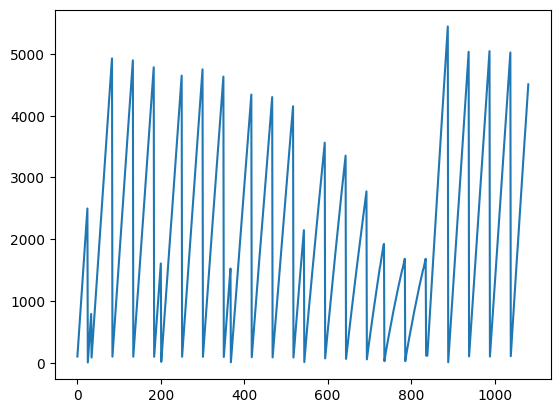

In [16]:
path: str = '../dataset/cleaned/CS2_38_cleaned.csv'
# Carica il DataFrame dal tuo file CSV
df = pd.read_csv(path)
curr_index = 1
actual_cap = 0.0
nominal_cap = 0.0

df_soh = pd.DataFrame()
values = [value['Charge_Capacity(Ah)'].max() for key, value in df.groupby('Cycle_Index')]
perc = [i / values[0] * 100 for i in values]

plt.plot(perc)

In [48]:
path: str = '../dataset/cleaned/CS2_38_cleaned.csv'
# Carica il DataFrame dal tuo file CSV
df = pd.read_csv(path)
curr_index = 1
actual_cap = 0.0
nominal_cap = 0.0

df_soh = pd.DataFrame()

for index, group in df.groupby('Cycle_Index'):
    actual_cap += group['Discharge_Capacity(Ah)'].iloc[index]
    nominal_cap = max(nominal_cap, group['Charge_Capacity(Ah)'].max())

    # Aggiungi l'ultima riga al DataFrame df_soh
    if nominal_cap == 0:
        soh = 0  # Assegna un valore predefinito in caso di divisione per zero
    else:
        soh = (actual_cap / nominal_cap) * 100
    row = pd.DataFrame([{'Cycle_Index': curr_index, 'actual_cap': actual_cap, 'nominal_cap': nominal_cap, 'soh': soh}])
    df_soh = pd.concat([df_soh, row])

    df_soh.reset_index(drop=True, inplace=True)


IndexError: single positional indexer is out-of-bounds

In [ ]:
df_soh.to_csv(os.path.join(cleaned, 'df_soh.csv'), index=False)

In [ ]:
path: str = '../dataset/cleaned/CS2_38_cleaned.csv'
# Carica il DataFrame dal tuo file CSV
df = pd.read_csv(path)
curr_index = 1
actual_cap = 0.0
nominal_cap = 0.0
df_soh = pd.DataFrame()
soh = 0.0

df = df.groupby(df_temp[c_index])
for key, value in df:
    if value['Cycle_Index'] == curr_index:
        actual_cap += value['Discharge_Capacity(Ah)']
        if value['Charge_Capacity(Ah)'] > nominal_cap:
            nominal_cap = value['Charge_Capacity(Ah)']
    else:
        soh = (actual_cap / nominal_cap) * 100
        row = pd.DataFrame([{'actual_cap': actual_cap, 'nominal_cap': nominal_cap, 'soh':soh}])
        df_soh = pd.concat([df_soh, row])
        curr_index += 1
        actual_cap = 0.0
        nominal_cap = 0.0
        soh = 0.0



In [ ]:
plt.plot(df['Cycle_Index'], df['Nominal_Capacity'], label='Nominal Capacity')
plt.plot(df['Cycle_Index'], df['Actual_Capacity'], label='Actual Capacity')
plt.xlabel('Cycle Index')
plt.ylabel('Capacity (SOH Sum)')
plt.legend()
plt.show()